# Contents
- [Simpsons Paradox](#Simpsons-Paradox)
- [Will Rogers Phenomenon](#Will-Rogers-Phenomenon)
___

# Simpsons Paradox

Simpson's Paradox occurs when a trend observed in individual groups disappears or reverses when the groups are combined. This often happens due to differences in group sizes or confounding variables.

#### Example:
Imagine you're testing two versions of a website:
- **Website 1** (current design).
- **Website 2** (new design).

You measure the **conversion rates** (percentage of users who make a purchase) for each website on two platforms:
- **Mobile** users.
- **Desktop** users.

#### Observations:
1. On **Mobile**, both websites perform equally well.
2. On **Desktop**, Website 1 performs better.
3. However, when combining data across both platforms, Website 2 appears to perform better.

This apparent contradiction demonstrates Simpson's Paradox and highlights the importance of analyzing group-level data.

#### Goals:
1. Analyze conversion rates for Website 1 and Website 2 by platform.
2. Compute overall conversion rates.
3. Visualize and explain Simpson's Paradox.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each platform and channel
data = {
    "Platform": ["Twitter", "Twitter", "Instagram", "Instagram"],
    "Channel": ["Mobile", "Web", "Mobile", "Web"],
    "Visitors": [10000, 2000, 2000, 10000],
    "Conversions": [1000, 150, 300, 1200]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate conversion rate for each platform and channel
df["Conversion Rate"] = df["Conversions"] / df["Visitors"] * 100

# Combine data by channel
combined = df.groupby("Channel").sum()
combined["Conversion Rate"] = combined["Conversions"] / combined["Visitors"] * 100

# Extract platform names and conversion rates for plotting
platforms = df['Platform'].unique()  # Extract unique platforms
mobile_rates = df[df['Channel'] == 'Mobile']['Conversion Rate']
web_rates = df[df['Channel'] == 'Web']['Conversion Rate']

# Extract combined mobile and web rates
combined_mobile = combined['Conversion Rate'][0]
combined_web = combined['Conversion Rate'][1]

/var/folders/dg/01ppfw3n6_jbnx4xdx0vdmj40000gn/T/ipykernel_10218/93891631.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined = df.groupby("Channel").sum()


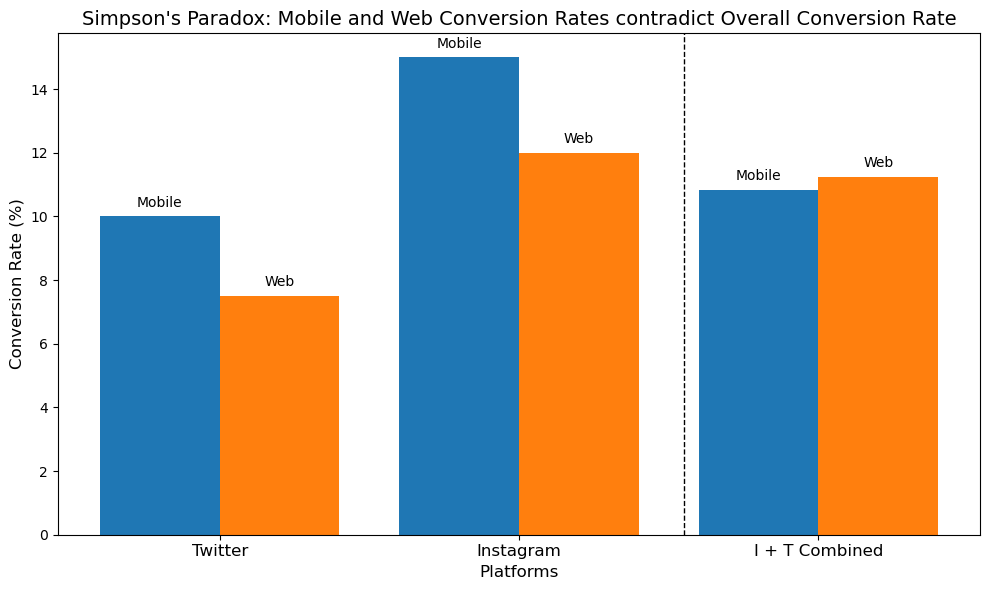

In [23]:
# Define a new color palette to match the attached plot
mobile_color = '#1f77b4'  # Blue for mobile
web_color = '#ff7f0e'     # Orange for web

# Create the plot with the correct data
plt.figure(figsize=(10, 6))

# x positions for Twitter, Instagram, and Combined
x = range(3)

# Bar plot for mobile and web rates for Twitter and Instagram
bars1 = plt.bar(x[0], mobile_rates.iloc[0], width=0.4, label="Mobile", align='center', color=mobile_color)
bars2 = plt.bar(x[0] + 0.4, web_rates.iloc[0], width=0.4, label="Web", align='center', color=web_color)

bars3 = plt.bar(x[1], mobile_rates.iloc[1], width=0.4, label="Mobile", align='center', color=mobile_color)
bars4 = plt.bar(x[1] + 0.4, web_rates.iloc[1], width=0.4, label="Web", align='center', color=web_color)

# Add the combined bars (Mobile vs Web for Combined)
plt.bar([2], [combined_mobile], width=0.4, label="Mobile", align='center', color=mobile_color)
plt.bar([2 + 0.4], [combined_web], width=0.4, label="Web", align='center', color=web_color)

# Customize plot labels and title
plt.xlabel("Platforms", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("Simpson's Paradox: Mobile and Web Conversion Rates contradict Overall Conversion Rate", fontsize=14)

# Set x-ticks and labels
plt.xticks([x[0] + 0.2, x[1] + 0.2, x[2] + 0.2], ['Twitter', 'Instagram', 'I + T Combined'], fontsize=12)

# Add text labels for categories (Mobile, Web, Combined)
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Mobile', ha='center', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Web', ha='center', fontsize=10)

for bar in bars3:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Mobile', ha='center', fontsize=10)
for bar in bars4:
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.3, 'Web', ha='center', fontsize=10)

# Add text labels for the combined bars
plt.text(2, combined_mobile + 0.3, 'Mobile', ha='center', fontsize=10)
plt.text(2 + 0.4, combined_web + 0.3, 'Web', ha='center', fontsize=10)

# Add vertical line before "Combined" category
plt.axvline(x=1.75, color='black', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()


___
[Back to the top](#Contents)

# Will Rogers Phenomenon


Create Data


In [54]:
import pandas as pd

# Simulated student data for two classes
data = {
    "Class": ["A", "A", "A", "B", "B", "B"],
    "Student": ["S1", "S2", "S3", "S4", "S5", "S6"],
    "Score": [90, 85, 80, 30, 35, 40]  # High scores in Class A, low scores in Class B
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the initial DataFrame
print("Initial Data:")
print(df)


Initial Data:
  Class Student  Score
0     A      S1     90
1     A      S2     85
2     A      S3     80
3     B      S4     30
4     B      S5     35
5     B      S6     40


Scatter Plot


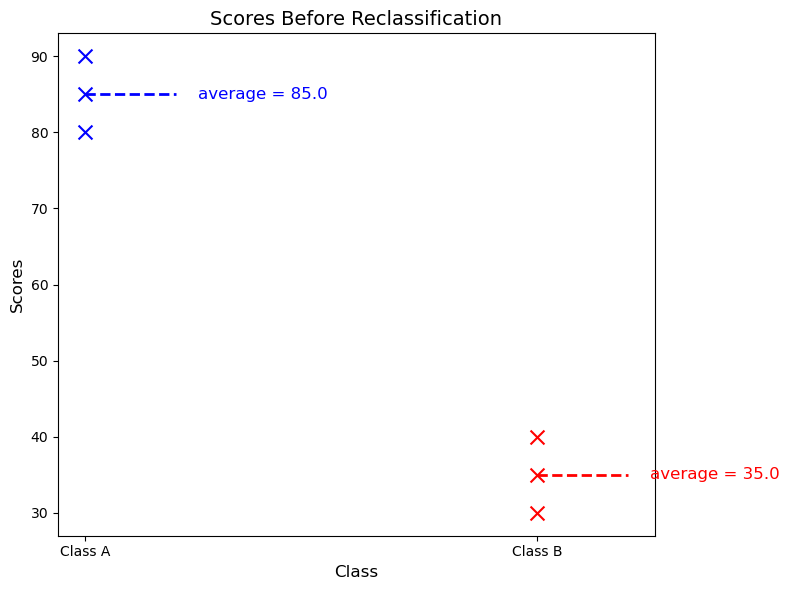

In [56]:
import matplotlib.pyplot as plt

# Scatter plot before reclassification with local average markers and annotations
plt.figure(figsize=(8, 6))

# Plot the scores for Class A and Class B before reclassification
plt.scatter(df[df['Class'] == 'A']['Class'], df[df['Class'] == 'A']['Score'], color='blue', marker='x', s=100)
plt.scatter(df[df['Class'] == 'B']['Class'], df[df['Class'] == 'B']['Score'], color='red', marker='x', s=100)

# Calculate and print the average scores before reclassification
avg_before = df.groupby("Class")["Score"].mean()

# Add small local horizontal lines denoting the group averages
plt.plot([0, 0.2], [avg_before['A'], avg_before['A']], color='blue', linestyle='--', linewidth=2)
plt.plot([1, 1.2], [avg_before['B'], avg_before['B']], color='red', linestyle='--', linewidth=2)

# Annotate the average next to the small line with the new format
plt.text(0.25, avg_before['A'], f'average = {avg_before["A"]}', color='blue', fontsize=12, verticalalignment='center')
plt.text(1.25, avg_before['B'], f'average = {avg_before["B"]}', color='red', fontsize=12, verticalalignment='center')

# Customize plot labels and title
plt.title('Scores Before Reclassification', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks([0, 1], ['Class A', 'Class B'])  # Set x-ticks to class labels

# Show the plot
plt.tight_layout()
plt.show()



Simulate Student Movement (Reclassification)

In [57]:
# Simulate reclassification: Move the lowest student (S3 with score 80) from Class A to Class B
df_reclassified = df.copy()
df_reclassified.loc[df_reclassified["Student"] == "S3", "Class"] = "B"

# Display the reclassified DataFrame
print("\nReclassified Data:")
print(df_reclassified)




Reclassified Data:
  Class Student  Score
0     A      S1     90
1     A      S2     85
2     B      S3     80
3     B      S4     30
4     B      S5     35
5     B      S6     40


Scatter Plot After Reclassification 

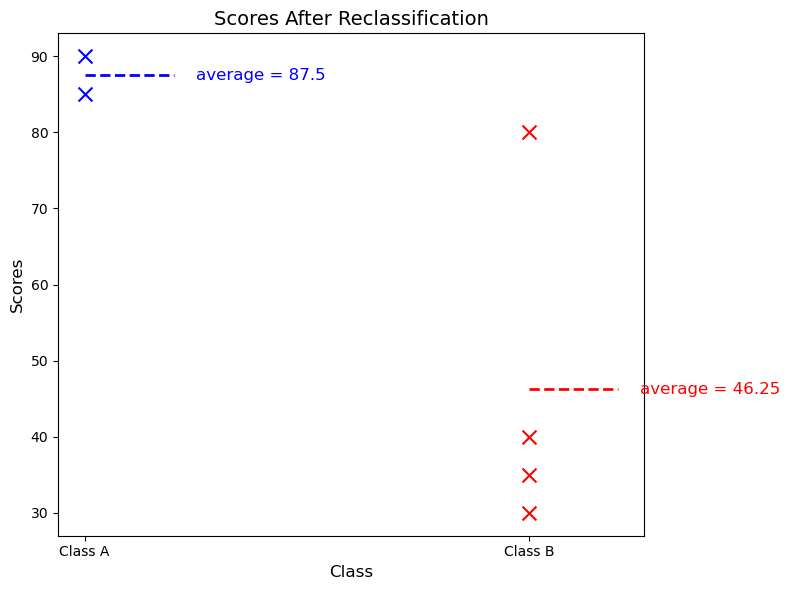

In [63]:
# Scatter plot after reclassification with local average markers and annotations
plt.figure(figsize=(8, 6))

# Plot the scores for Class A and Class B after reclassification
plt.scatter(df_reclassified[df_reclassified['Class'] == 'A']['Class'], 
            df_reclassified[df_reclassified['Class'] == 'A']['Score'], color='blue', marker='x', s=100)
plt.scatter(df_reclassified[df_reclassified['Class'] == 'B']['Class'], 
            df_reclassified[df_reclassified['Class'] == 'B']['Score'], color='red', marker='x', s=100)

# Calculate and print the average scores after reclassification
avg_after = df_reclassified.groupby("Class")["Score"].mean()

# Add small local horizontal lines denoting the group averages
plt.plot([0, 0.2], [avg_after['A'], avg_after['A']], color='blue', linestyle='--', linewidth=2)
plt.plot([1, 1.2], [avg_after['B'], avg_after['B']], color='red', linestyle='--', linewidth=2)

# Annotate the average next to the small line with the new format
plt.text(0.25, avg_after['A'], f'average = {avg_after["A"]}', color='blue', fontsize=12, verticalalignment='center')
plt.text(1.25, avg_after['B'], f'average = {avg_after["B"]}', color='red', fontsize=12, verticalalignment='center')

# Customize plot labels and title
plt.title('Scores After Reclassification', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks([0, 1], ['Class A', 'Class B'])  # Set x-ticks to class labels

# Show the plot
plt.tight_layout()
plt.show()



___
[Back to the top](#Contents)